## Michael Deekimcheng and Jeremy Tan - Final Project

In [46]:
## necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## sklearn packages
from sklearn import tree
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, f1_score, roc_curve, roc_auc_score, accuracy_score, precision_score, recall_score, silhouette_score
from sklearn.mixture import GaussianMixture
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder, LabelEncoder
from sklearn.tree import DecisionTreeClassifier

## import dataset
from ucimlrepo import fetch_ucirepo 

In [47]:
# fetch dataset 
htru2 = fetch_ucirepo(id = 372) 
  
# data (as pandas dataframes) 
X = htru2.data.features 
y = htru2.data.targets 

## From the readme.txt
1. Mean of the integrated profile.
2. Standard deviation of the integrated profile.
3. Excess kurtosis of the integrated profile.
4. Skewness of the integrated profile.
5. Mean of the DM-SNR curve.
6. Standard deviation of the DM-SNR curve.
7. Excess kurtosis of the DM-SNR curve.
8. Skewness of the DM-SNR curve.

Each row lists the variables first,
	and the class label is the final entry. The class labels used are 0 (negative) and 1 
	(positive).

## Exploratory Data Analysis

In [48]:
df = pd.concat([X,y], axis = 1)
df

,Profile_mean,Profile_stdev,Profile_skewness,Profile_kurtosis,DM_mean,DM_stdev,DM_skewness,DM_kurtosis,class
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0
...,...,...,...,...,...,...,...,...,...
17893,136.429688,59.847421,-0.187846,-0.738123,1.296823,12.166062,15.450260,285.931022,0
17894,122.554688,49.485605,0.127978,0.323061,16.409699,44.626893,2.945244,8.297092,0
17895,119.335938,59.935939,0.159363,-0.743025,21.430602,58.872000,2.499517,4.595173,0
17896,114.507812,53.902400,0.201161,-0.024789,1.946488,13.381731,10.007967,134.238910,0


In [49]:
df.to_csv("HTRU2.csv")

# Classification Method 1: Decision Tree Classification

In [50]:
# 30% Train Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

# Create and train the decision tree 
results = []
for depth in range(3,11):
    clf = DecisionTreeClassifier(random_state=0,max_depth = depth)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, pos_label = 1)  
    rec = recall_score(y_test, y_pred, pos_label = 1)
    f1 = f1_score(y_test, y_pred, pos_label = 1)

    results.append({
        'Max Depth': depth,
        'accuracy': acc,
        'precision': prec,
        'recall': rec,
        'f1_score': f1
    })


# Create DataFrame of results
results_df = pd.DataFrame(results)
results_df.head()

,Max Depth,accuracy,precision,recall,f1_score
0,3,0.979330,0.891765,0.853604,0.872267
1,4,0.980261,0.910194,0.844595,0.876168
2,5,0.980074,0.926582,0.824324,0.872467
3,6,0.979143,0.908867,0.831081,0.868235
4,7,0.979516,0.930412,0.813063,0.867788


In [51]:
# Get the best depth
best_depth = results_df.loc[results_df['f1_score'].idxmax(), 'Max Depth']
best_f1 = results_df.loc[results_df['f1_score'].idxmax(), 'f1_score']
print(f"\n Best depth (by f1_score): {int(best_depth)} with f1_score {round(best_f1, 4)}")

best_clf = DecisionTreeClassifier(random_state = 0,max_depth = best_depth)
best_clf.fit(X_train, y_train)
y_pred = best_clf.predict(X_test)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred, pos_label = 1)
rec = recall_score(y_test, y_pred, pos_label = 1)
f1 = f1_score(y_test, y_pred, pos_label = 1)

print(acc)
print(prec)
print(rec)
print(f1)


 Best depth (by f1_score): 4 with f1_score 0.8762
0.9802607076350093
0.9101941747572816
0.8445945945945946
0.8761682242990654


Text(0.5, 1.0, 'Decision Tree Classifier')

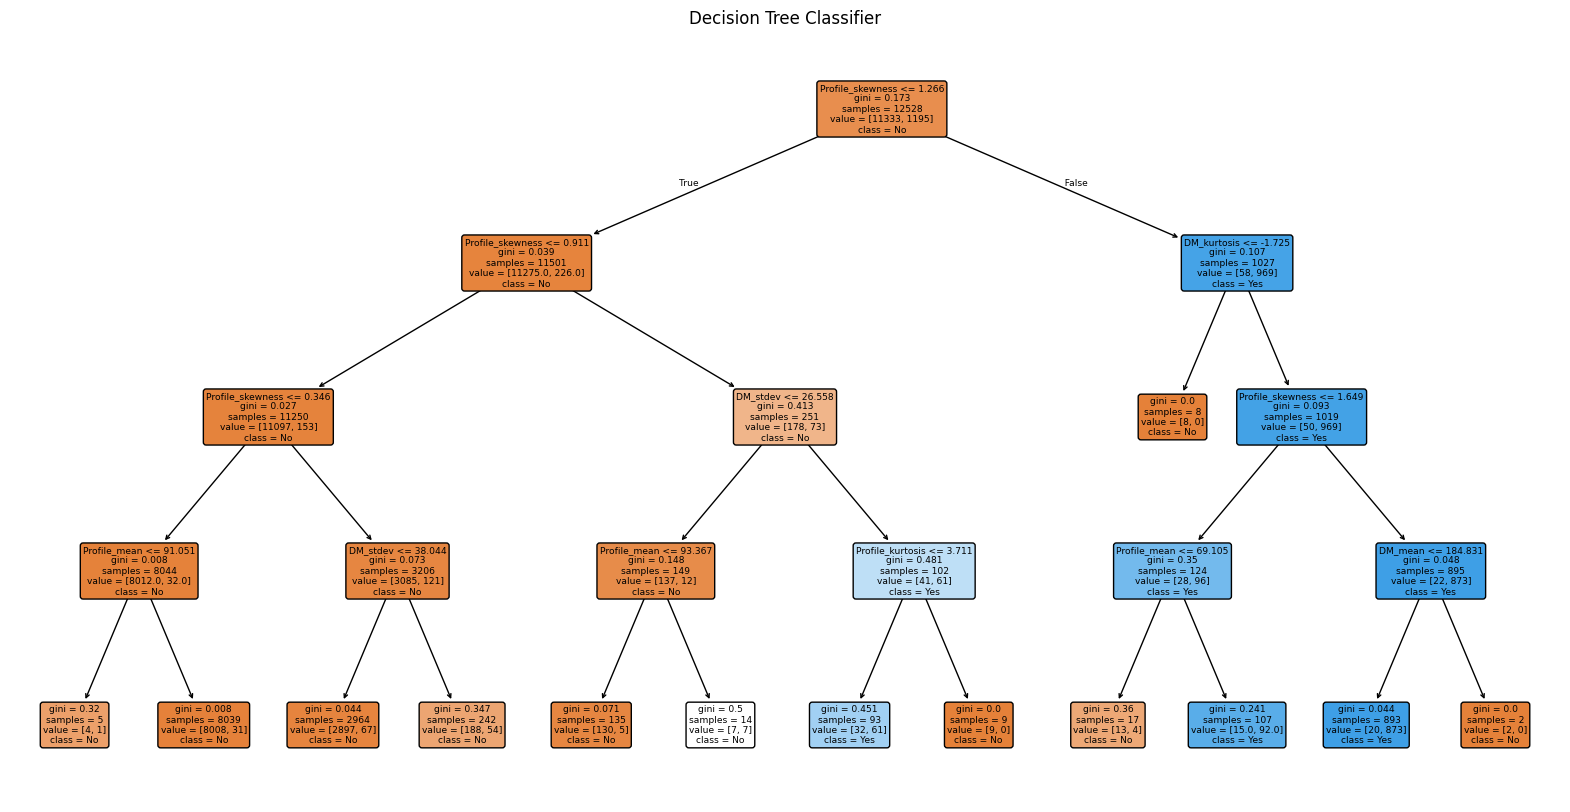

In [52]:
plt.figure(figsize = (20, 10))
tree.plot_tree(best_clf, filled = True, feature_names = X.columns, class_names  =['No', 'Yes'], rounded = True)
plt.title('Decision Tree Classifier')


 Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4926
           1       0.91      0.84      0.88       444

    accuracy                           0.98      5370
   macro avg       0.95      0.92      0.93      5370
weighted avg       0.98      0.98      0.98      5370



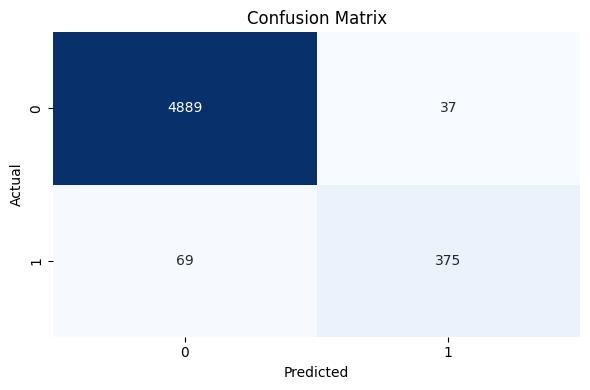

In [53]:
# Classification report
print("\n Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (6, 4))
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = 'Blues', cbar = False)
plt.title(f"Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

# Classification Method 2: Gaussian Naive Bayes

In [54]:
columns_to_scale = df.columns[:-1]

# Standard Scaling
standard_scaler = StandardScaler()
df_standard_scaled = df.copy()
df_standard_scaled[columns_to_scale] = standard_scaler.fit_transform(df[columns_to_scale])

# For Min-Max Scaling
minmax_scaler = MinMaxScaler()
df_minmax_scaled = df.copy()
df_minmax_scaled[columns_to_scale] = minmax_scaler.fit_transform(df[columns_to_scale])

X_standard = df_standard_scaled.drop(columns={'class'})
y_standard = df_standard_scaled['class']

X_minmax = df_minmax_scaled.drop(columns={'class'})
y_minmax = df_minmax_scaled['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
X_train_standard, X_test_standard, y_train_standard, y_test_standard = train_test_split(X_standard, y_standard, test_size = 0.3, random_state = 0)
X_train_minmax, X_test_minmax, y_train_minmax, y_test_minmax = train_test_split(X_minmax, y_minmax, test_size = 0.3, random_state = 0)

In [55]:
# Unscaled dataset
nb_unscaled = GaussianNB()
nb_unscaled.fit(X_train, y_train)
y_pred_unscaled = nb_unscaled.predict(X_test)

print(f'accuracy score is {accuracy_score(y_test, y_pred_unscaled)}')
print(f'precision score is {precision_score(y_test, y_pred_unscaled, pos_label = 1)}')
print(f'recall score is {recall_score(y_test, y_pred_unscaled, pos_label = 1)}')
print(f'f1 score is {f1_score(y_test, y_pred_unscaled, pos_label = 1)}')

accuracy score is 0.948975791433892
precision score is 0.6450511945392492
recall score is 0.8513513513513513
f1 score is 0.7339805825242719


C:\Users\jerem\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



 Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.96      0.97      4926
           1       0.65      0.85      0.73       444

    accuracy                           0.95      5370
   macro avg       0.82      0.90      0.85      5370
weighted avg       0.96      0.95      0.95      5370



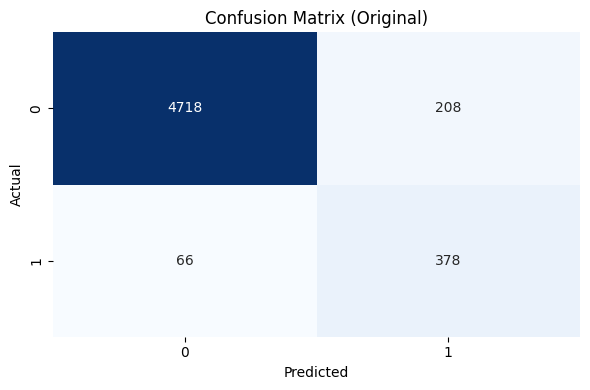

In [56]:
# Classification report
print("\n Classification Report:")
print(classification_report(y_test, y_pred_unscaled))

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_unscaled)
plt.figure(figsize = (6, 4))
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = 'Blues', cbar = False)
plt.title(f"Confusion Matrix (Original)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

In [57]:
# Min-max scaled dataset
nb_minmax = GaussianNB()
nb_minmax.fit(X_train_minmax, y_train_minmax)
y_pred_minmax = nb_minmax.predict(X_test_minmax)

print(f'accuracy score is {accuracy_score(y_test_minmax, y_pred_minmax)}')
print(f'precision score is {precision_score(y_test_minmax, y_pred_minmax, pos_label = 1)}')
print(f'recall score is {recall_score(y_test_minmax, y_pred_minmax, pos_label = 1)}')
print(f'f1 score is {f1_score(y_test_minmax, y_pred_minmax, pos_label = 1)}')

accuracy score is 0.948975791433892
precision score is 0.6450511945392492
recall score is 0.8513513513513513
f1 score is 0.7339805825242719



 Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.96      0.97      4926
           1       0.65      0.85      0.73       444

    accuracy                           0.95      5370
   macro avg       0.82      0.90      0.85      5370
weighted avg       0.96      0.95      0.95      5370



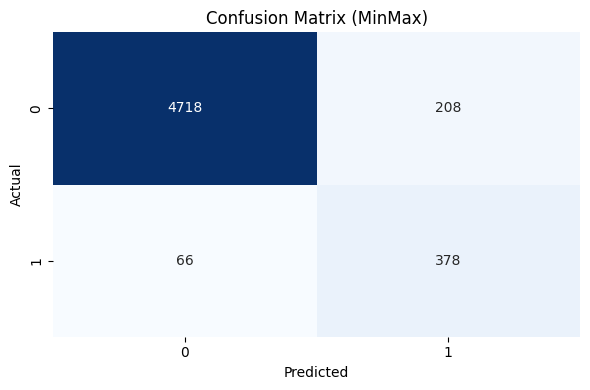

In [58]:
# Classification report
print("\n Classification Report:")
print(classification_report(y_test_minmax, y_pred_minmax))

# Confusion matrix
conf_matrix = confusion_matrix(y_test_minmax, y_pred_minmax)
plt.figure(figsize = (6, 4))
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = 'Blues', cbar = False)
plt.title(f"Confusion Matrix (MinMax)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

In [59]:
# Standard scaled dataset
nb_standard = GaussianNB()
nb_standard.fit(X_train_standard, y_train_standard)
y_pred_standard = nb_standard.predict(X_test_standard)

print(f'accuracy score is {accuracy_score(y_test_standard, y_pred_standard)}')
print(f'precision score is {precision_score(y_test_standard, y_pred_standard, pos_label = 1)}')
print(f'recall score is {recall_score(y_test_standard, y_pred_standard, pos_label = 1)}')
print(f'f1 score is {f1_score(y_test_standard, y_pred_standard, pos_label = 1)}')

accuracy score is 0.948975791433892
precision score is 0.6450511945392492
recall score is 0.8513513513513513
f1 score is 0.7339805825242719



 Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.96      0.97      4926
           1       0.65      0.85      0.73       444

    accuracy                           0.95      5370
   macro avg       0.82      0.90      0.85      5370
weighted avg       0.96      0.95      0.95      5370



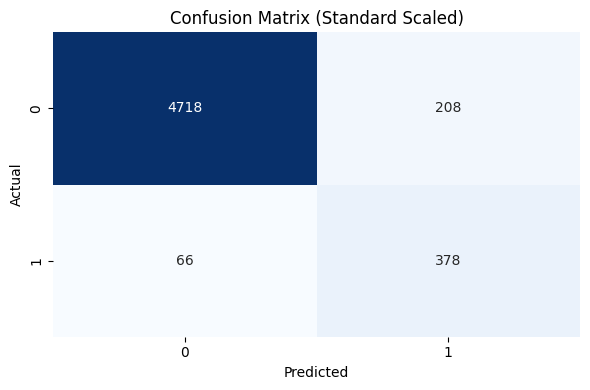

In [60]:
# Classification report
print("\n Classification Report:")
print(classification_report(y_test_standard, y_pred_standard))

# Confusion matrix
conf_matrix = confusion_matrix(y_test_standard, y_pred_standard)
plt.figure(figsize = (6, 4))
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = 'Blues', cbar = False)
plt.title(f"Confusion Matrix (Standard Scaled)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

# Classification Method 3: K Nearest Neighbors

### Original Dataset

In [61]:
# To store metrics
results = []

for k in range(5, 21):
    knn_model = KNeighborsClassifier(n_neighbors = k, p = 2)  
    knn_model.fit(X_train, y_train.values.ravel())
    y_pred = knn_model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, pos_label = 1)  
    rec = recall_score(y_test, y_pred, pos_label = 1)
    f1 = f1_score(y_test, y_pred, pos_label = 1)

    results.append({
        'k': k,
        'accuracy': acc,
        'precision': prec,
        'recall': rec,
        'f1_score': f1
    })

original_results_df = pd.DataFrame(results)
original_results_df

,k,accuracy,precision,recall,f1_score
0,5,0.973743,0.881612,0.788288,0.832342
1,6,0.975419,0.926230,0.763514,0.837037
2,7,0.973184,0.888601,0.772523,0.826506
3,8,0.974488,0.915989,0.761261,0.831488
4,9,0.973184,0.882653,0.779279,0.827751
5,10,0.974488,0.913747,0.763514,0.831902
6,11,0.974860,0.905512,0.777027,0.836364
7,12,0.975791,0.922043,0.772523,0.840686
8,13,0.975047,0.905759,0.779279,0.837772
9,14,0.975047,0.916667,0.768018,0.835784



 Best k (by f1_score): 12 with f1_score 0.8407
accuracy score is 0.9757914338919925
precision score is 0.9220430107526881
recall score is 0.7725225225225225
f1 score is 0.8406862745098039

 Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      4926
           1       0.92      0.77      0.84       444

    accuracy                           0.98      5370
   macro avg       0.95      0.88      0.91      5370
weighted avg       0.98      0.98      0.97      5370



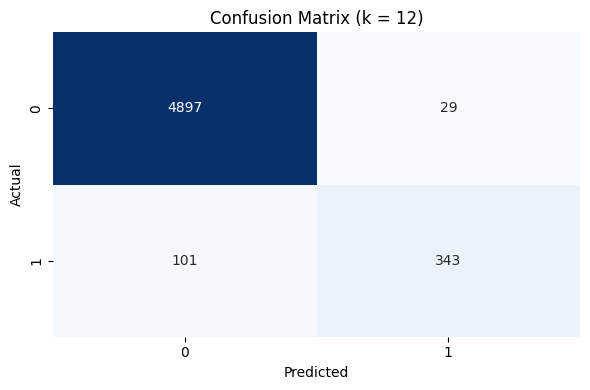

In [62]:
# Get the best k
best_k = original_results_df.loc[original_results_df['f1_score'].idxmax(), 'k']
best_f1 = original_results_df.loc[original_results_df['f1_score'].idxmax(), 'f1_score']
print(f"\n Best k (by f1_score): {int(best_k)} with f1_score {round(best_f1, 4)}")


# Train model with best k
best_knn = KNeighborsClassifier(n_neighbors=int(best_k), p = 2)
best_knn.fit(X_train, y_train.values.ravel())
best_pred = best_knn.predict(X_test)

print(f'accuracy score is {accuracy_score(y_test, best_pred)}')
print(f'precision score is {precision_score(y_test, best_pred, pos_label = 1)}')
print(f'recall score is {recall_score(y_test, best_pred, pos_label = 1)}')
print(f'f1 score is {f1_score(y_test, best_pred, pos_label = 1)}')

# Classification report
print("\n Classification Report:")
print(classification_report(y_test, best_pred))

# Confusion matrix
conf_matrix = confusion_matrix(y_test, best_pred)
plt.figure(figsize = (6, 4))
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = 'Blues', cbar = False)
plt.title(f"Confusion Matrix (k = {int(best_k)})")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

### Standard Scaled Dataset

In [63]:
# To store metrics
results = []

for k in range(5, 21):
    knn_model = KNeighborsClassifier(n_neighbors = k, p = 2)  
    knn_model.fit(X_train_standard, y_train_standard.values.ravel())
    y_pred = knn_model.predict(X_test_standard)

    acc = accuracy_score(y_test_standard, y_pred)
    prec = precision_score(y_test_standard, y_pred, pos_label = 1)  
    rec = recall_score(y_test_standard, y_pred, pos_label = 1)
    f1 = f1_score(y_test_standard, y_pred, pos_label = 1)

    results.append({
        'k': k,
        'accuracy': acc,
        'precision': prec,
        'recall': rec,
        'f1_score': f1
    })

standard_results_df = pd.DataFrame(results)
standard_results_df

,k,accuracy,precision,recall,f1_score
0,5,0.979516,0.917500,0.826577,0.869668
1,6,0.979702,0.937337,0.808559,0.868198
2,7,0.979888,0.926396,0.822072,0.871122
3,8,0.979702,0.939633,0.806306,0.867879
4,9,0.979330,0.930233,0.810811,0.866426
5,10,0.978957,0.934383,0.801802,0.863030
6,11,0.978957,0.925450,0.810811,0.864346
7,12,0.979143,0.932292,0.806306,0.864734
8,13,0.978957,0.925450,0.810811,0.864346
9,14,0.978399,0.929319,0.799550,0.859564



 Best k (by f1_score): 7 with f1_score 0.8711
accuracy score is 0.9798882681564246
precision score is 0.9263959390862944
recall score is 0.8220720720720721
f1 score is 0.8711217183770883

 Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      4926
           1       0.93      0.82      0.87       444

    accuracy                           0.98      5370
   macro avg       0.96      0.91      0.93      5370
weighted avg       0.98      0.98      0.98      5370



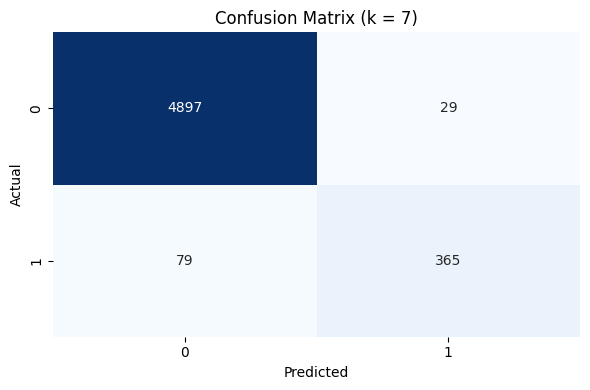

In [64]:
# Get the best k
best_k = standard_results_df.loc[standard_results_df['f1_score'].idxmax(), 'k']
best_f1 = standard_results_df.loc[standard_results_df['f1_score'].idxmax(), 'f1_score']
print(f"\n Best k (by f1_score): {int(best_k)} with f1_score {round(best_f1, 4)}")

# Train model with best k
best_knn = KNeighborsClassifier(n_neighbors = int(best_k), p = 2)
best_knn.fit(X_train_standard, y_train_standard.values.ravel())
best_pred = best_knn.predict(X_test_standard)

print(f'accuracy score is {accuracy_score(y_test_standard, best_pred)}')
print(f'precision score is {precision_score(y_test_standard, best_pred, pos_label = 1)}')
print(f'recall score is {recall_score(y_test_standard, best_pred, pos_label = 1)}')
print(f'f1 score is {f1_score(y_test_standard, best_pred, pos_label = 1)}')

# Classification report
print("\n Classification Report:")
print(classification_report(y_test_standard, best_pred))

# Confusion matrix
conf_matrix = confusion_matrix(y_test_standard, best_pred)
plt.figure(figsize = (6, 4))
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = 'Blues', cbar = False)
plt.title(f"Confusion Matrix (k = {int(best_k)})")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

### Minmax Scaled

In [65]:
# To store metrics
results = []

for k in range(5, 21):
    knn_model = KNeighborsClassifier(n_neighbors = k, p = 2)  
    knn_model.fit(X_train_minmax, y_train_minmax.values.ravel())
    y_pred = knn_model.predict(X_test_minmax)

    acc = accuracy_score(y_test_minmax, y_pred)
    prec = precision_score(y_test_minmax, y_pred, pos_label = 1)  
    rec = recall_score(y_test_minmax, y_pred, pos_label = 1)
    f1 = f1_score(y_test_minmax, y_pred, pos_label = 1)

    results.append({
        'k': k,
        'accuracy': acc,
        'precision': prec,
        'recall': rec,
        'f1_score': f1
    })

# Optional: print or convert to DataFrame for easy viewing
import pandas as pd
minmax_results_df = pd.DataFrame(results)
minmax_results_df

,k,accuracy,precision,recall,f1_score
0,5,0.980074,0.916049,0.835586,0.873969
1,6,0.979888,0.937500,0.810811,0.869565
2,7,0.979330,0.913151,0.828829,0.868949
3,8,0.980074,0.939948,0.810811,0.870617
4,9,0.979888,0.928571,0.819820,0.870813
5,10,0.978771,0.931937,0.801802,0.861985
6,11,0.978771,0.925258,0.808559,0.862981
7,12,0.979516,0.944149,0.799550,0.865854
8,13,0.979143,0.934555,0.804054,0.864407
9,14,0.978585,0.936340,0.795045,0.859927



 Best k (by f1_score): 5 with f1_score 0.874
accuracy score is 0.9800744878957169
precision score is 0.9160493827160494
recall score is 0.8355855855855856
f1 score is 0.8739693757361602

 Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4926
           1       0.92      0.84      0.87       444

    accuracy                           0.98      5370
   macro avg       0.95      0.91      0.93      5370
weighted avg       0.98      0.98      0.98      5370



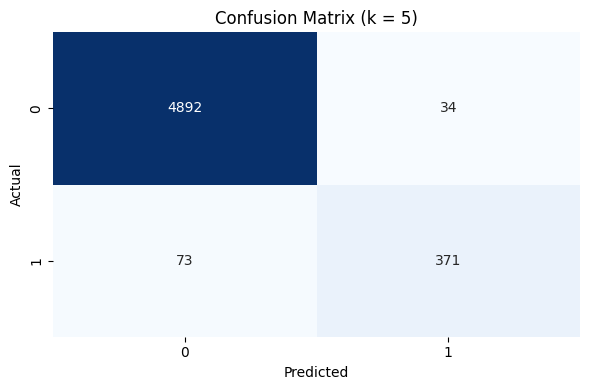

In [66]:
# Get the best k
best_k = minmax_results_df.loc[minmax_results_df['f1_score'].idxmax(), 'k']
best_f1 = minmax_results_df.loc[minmax_results_df['f1_score'].idxmax(), 'f1_score']
print(f"\n Best k (by f1_score): {int(best_k)} with f1_score {round(best_f1, 4)}")

# Train model with best k
best_knn = KNeighborsClassifier(n_neighbors = int(best_k), p = 2)
best_knn.fit(X_train_minmax, y_train_minmax.values.ravel())
best_pred = best_knn.predict(X_test_minmax)

print(f'accuracy score is {accuracy_score(y_test_minmax, best_pred)}')
print(f'precision score is {precision_score(y_test_minmax, best_pred, pos_label = 1)}')
print(f'recall score is {recall_score(y_test_minmax, best_pred, pos_label = 1)}')
print(f'f1 score is {f1_score(y_test_minmax, best_pred, pos_label = 1)}')

# Classification report
print("\n Classification Report:")
print(classification_report(y_test_minmax, best_pred))

# Confusion matrix
conf_matrix = confusion_matrix(y_test_minmax, best_pred)
plt.figure(figsize = (6, 4))
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = 'Blues', cbar = False)
plt.title(f"Confusion Matrix (k = {int(best_k)})")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

# Classification Method 4: Random Forest

In [67]:
# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

results = []
for depth in range(3,11):
    rf_model = RandomForestClassifier(n_estimators = 100, max_depth = depth, random_state = 0)
    rf_model.fit(X_train, y_train.values.ravel())
    y_pred = rf_model.predict(X_test)
    
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, pos_label = 1)  
    rec = recall_score(y_test, y_pred, pos_label = 1)
    f1 = f1_score(y_test, y_pred, pos_label = 1)

    results.append({
        'Max Depth': depth,
        'accuracy': acc,
        'precision': prec,
        'recall': rec,
        'f1_score': f1
    })

results_df = pd.DataFrame(results)
results_df

,Max Depth,accuracy,precision,recall,f1_score
0,3,0.978957,0.936675,0.799550,0.862697
1,4,0.978585,0.929504,0.801802,0.860943
2,5,0.979888,0.932990,0.815315,0.870192
3,6,0.979330,0.928021,0.813063,0.866747
4,7,0.979702,0.926209,0.819820,0.869773
5,8,0.980261,0.931122,0.822072,0.873206
6,9,0.979888,0.924242,0.824324,0.871429
7,10,0.980447,0.922693,0.833333,0.875740


In [68]:
# Get the best depth
best_depth = results_df.loc[results_df['f1_score'].idxmax(), 'Max Depth']
best_f1 = results_df.loc[results_df['f1_score'].idxmax(), 'f1_score']
print(f"\n Best depth (by f1_score): {int(best_depth)} with f1_score {round(best_f1, 4)}")

best_rf = RandomForestClassifier(n_estimators = 100, max_depth = best_depth, random_state = 0)
best_rf.fit(X_train, y_train.values.ravel())
y_pred = best_rf.predict(X_test)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred, pos_label = 1)  
rec = recall_score(y_test, y_pred, pos_label = 1)
f1 = f1_score(y_test, y_pred, pos_label = 1)

print(acc)
print(prec)
print(rec)
print(f1)


 Best depth (by f1_score): 10 with f1_score 0.8757
0.9804469273743017
0.9226932668329177
0.8333333333333334
0.8757396449704142



 Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4926
           1       0.92      0.83      0.88       444

    accuracy                           0.98      5370
   macro avg       0.95      0.91      0.93      5370
weighted avg       0.98      0.98      0.98      5370



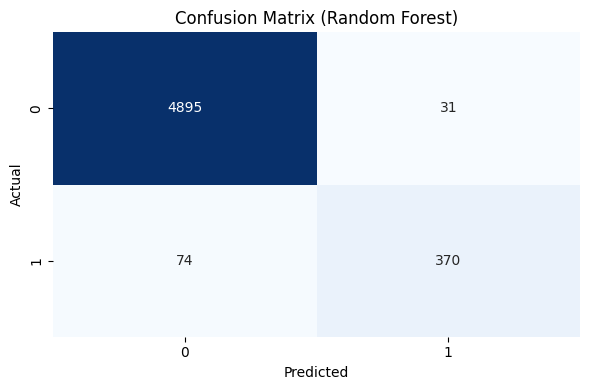

In [69]:
# Classification report
print("\n Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (6, 4))
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = 'Blues', cbar = False)
plt.title(f"Confusion Matrix (Random Forest)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

# Clustering Methods: KMeans and Gaussian Mixture Model

In [70]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

k_range = range(2, 11)
silhouette_scores = []
aic_scores = []
bic_scores = []

for k in k_range:
    kmeans = KMeans(n_clusters = k, random_state = 0)
    labels = kmeans.fit_predict(X_scaled)
    silhouette_scores.append(silhouette_score(X_scaled, labels))

for k in k_range:
    gmm = GaussianMixture(n_components = k, random_state = 0)
    gmm.fit(X_scaled)
    aic_scores.append(gmm.aic(X_scaled))
    bic_scores.append(gmm.bic(X_scaled))

In [71]:
print("KMeans Silhouette Scores for values of k between 2 and 10 inclusive:")
for i in k_range:
    print(f"k = {i}: Silhouette Score - {silhouette_scores[i-2]:.4f}")

print("\nGMM AIC and BIC for values of k between 2 and 10 inclusive:")
for i in k_range:
    print(f"k = {i}: AIC - {aic_scores[i-2]:.4f}, BIC - {bic_scores[i-2]:.4f}")

KMeans Silhouette Scores for values of k between 2 and 10 inclusive:
k = 2: Silhouette Score - 0.6010
k = 3: Silhouette Score - 0.5168
k = 4: Silhouette Score - 0.3531
k = 5: Silhouette Score - 0.3033
k = 6: Silhouette Score - 0.2691
k = 7: Silhouette Score - 0.2730
k = 8: Silhouette Score - 0.2771
k = 9: Silhouette Score - 0.2474
k = 10: Silhouette Score - 0.2355

GMM AIC and BIC for values of k between 2 and 10 inclusive:
k = 2: AIC - -5912.2476, BIC - -5218.7200
k = 3: AIC - -25519.8282, BIC - -24475.6406
k = 4: AIC - -78439.0160, BIC - -77044.1685
k = 5: AIC - -107037.0414, BIC - -105291.5339
k = 6: AIC - -118992.5557, BIC - -116896.3882
k = 7: AIC - -131133.4798, BIC - -128686.6523
k = 8: AIC - -137875.2562, BIC - -135077.7688
k = 9: AIC - -150160.0692, BIC - -147011.9217
k = 10: AIC - -157109.5705, BIC - -153610.7630


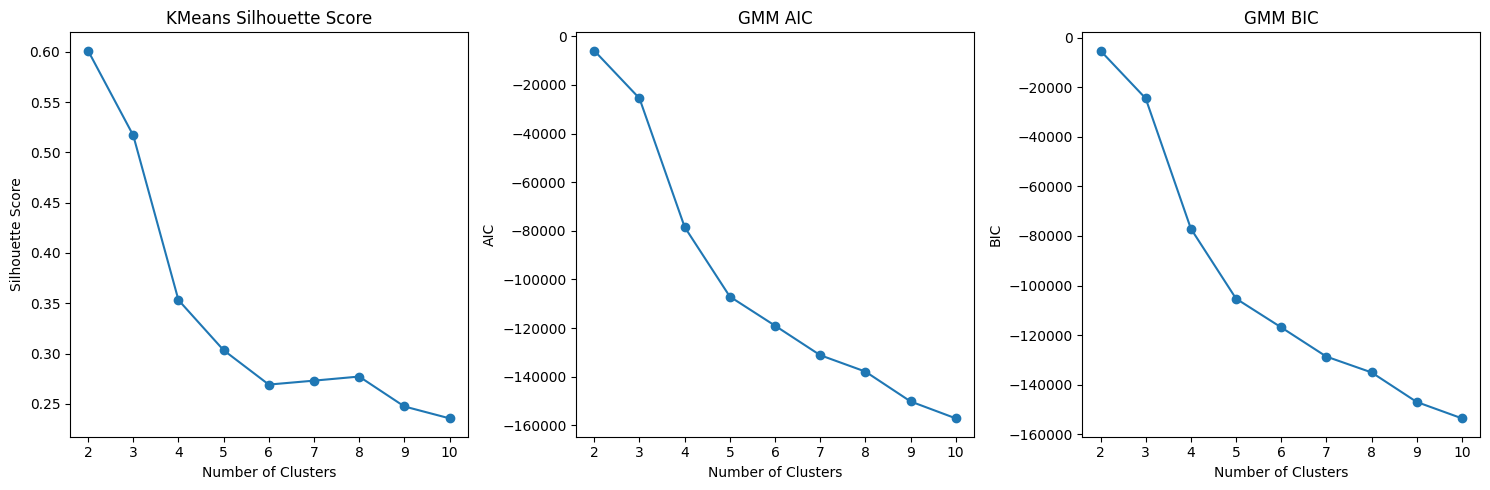

In [72]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.plot(k_range, silhouette_scores, marker = 'o')
plt.title("KMeans Silhouette Score")
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")

plt.subplot(1, 3, 2)
plt.plot(k_range, aic_scores, marker = 'o', label = 'AIC')
plt.title("GMM AIC")
plt.xlabel("Number of Clusters")
plt.ylabel("AIC")

plt.subplot(1, 3, 3)
plt.plot(k_range, bic_scores, marker = 'o', label = 'BIC')
plt.title("GMM BIC")
plt.xlabel("Number of Clusters")
plt.ylabel("BIC")

plt.tight_layout()
plt.show()

In [73]:
# Apply KMeans
kmeans = KMeans(n_clusters = 2, random_state = 0)
df['kmeans_cluster'] = kmeans.fit_predict(X_scaled)

# Apply GMM
gmm = GaussianMixture(n_components = 5, random_state = 0)
gmm.fit(X_scaled)
df['gmm_cluster'] = gmm.predict(X_scaled)


In [74]:
# Invert the mapping for interpretability with known cluster groupings
kmeans_mapping = (
    df.groupby('kmeans_cluster')['class']
    .mean()
    .sort_values()
    .to_dict()
)

# Invert the mapping: lowest pulsar rate maps to 0, highest maps to 1
cluster_to_label = {old: new for new, old in enumerate(kmeans_mapping)}
df['kmeans_cluster'] = df['kmeans_cluster'].map(cluster_to_label)

In [75]:
kmeans_mapping

{1: 0.022602437022539303, 0: 0.6221466731423021}

In [76]:
# To see how KMeans is close to the original classes in the dataset (since we have information on this)
true_labels = df.iloc[:,8]
knn_pred = df.iloc[:,9]

acc = accuracy_score(true_labels, knn_pred)
prec = precision_score(true_labels, knn_pred, pos_label = 1)  
rec = recall_score(true_labels, knn_pred, pos_label = 1)
f1 = f1_score(true_labels, knn_pred, pos_label = 1)

print(f'Accuracy: {round(acc, 4)}')
print(f'Precision: {round(prec, 4)}')
print(f'Recall: {round(rec, 4)}')
print(f'F1 Score: {round(f1, 4)}')

Accuracy: 0.9365
Precision: 0.6221
Recall: 0.7816
F1 Score: 0.6928
